# Критерий Васичека


## Теоретический вывод статистики критерия

Пусть $\{p_1, ..., p_n\}$ - набор вероятностей, $\quad \sum_{i=1}^{n} p_i = 1\quad$ и $\quad p_i > 0$ <br>

$\textbf{Энтропия}$ - мера равномерности вероятностей (то есть чем больше энтропия, тем ближе $p_\alpha$ друг к другу), она всегда положительна <br><br>

$H(P) = -\sum_{\alpha=1}^{n} p_\alpha \log p_\alpha$, $\qquad H_{max} = \log n\quad$ при $\quad p_\alpha = 1/n$ <br><br>

Для непрерывной случайной величины $\textit{X}$ $\textbf{дифференциальная энтропия}$ определяется так: <br><br>
$H(\textit{X}) = -\int_{-\infty}^{+\infty} f(x) \log f(x) \, dx$ <br><br>
Уточним, что дифференциальная энтропия может быть отрицательной, так как значения плотности вероятности могут быть больше 1 <br>

*Нормальное распределение имеет наибольшую дифференциальную энтропию среди всех распределений с такой же дисперсией*: <br>
$H = \frac{1}{2} \log \left( 2\pi \sigma^2 e \right)\quad$ для $\quad f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2}$



*Перейдем к формированию критерия о нормальности распределения*<br>

Представим дифференциальную энтропию $H(\textit{X}) = -\int_{-\infty}^{+\infty} f(x) \log f(x) \, dx \quad$ как $\quad H(\textit{X}) = \int_{0}^{1} \log (\frac{d}{dp} F^{-1}(y)) \, dp$ <br><br>
Пусть $x_1, ..., x_n, n \geq 3 $ - реализация выборки из распределения $F$ <br><br>
Аппроксимируем производную $\frac{d}{dp} F^{-1}(p)$, используя метод центральной разности (centered difference approximation): $\large \frac{F^{-1}(p + h) - F^{-1}(p - h)}{2h}, $ и заменим функцию распределения $F$ эмпирической функцией распределения $F_n$ <br><br>
Получим оценку для $\frac{d}{dp} F^{-1}(p): \ $ $\Large \frac{x_{(i+m)} \ - \ x_{(i - m)}}{2 \ \cdot \ \frac {m}{n}} \ $ для $\ \frac{i - 1}{n} < p \le \frac{i}{n}$, $\ \small i = m + 1, m + 2, .., n - m$, $ \ \small m - целое \ и \ m < \frac{n}{2}$, $\small \ x_{(1)} \le x_{(2)} \le .. \le x_{(n)}$<br><br>

Используем $x_{(i+m)} \ - \ x_{(1)}$ и $x_{(n)} \ - \ x_{(i - m)}$, если $\ p \le \frac{m}{n} \ $ и $p > \frac{n - m}{n}$ соответственно <br><br>

Таким образом, получаем **оценку для $H(X)$**: <br><br>
 $\ H_{mn} = n^{-1}  \sum_{i=1}^{n} log({\large \frac{x_{(i+m)} \ - \ x_{(i - m)}}{2 \ \cdot \ \frac {m}{n}}})$





Статистика критерия Васичека имеет вид <br>
$\boxed{\large K_{mn} = {\frac{n}{2ms}} (\prod_{i=1}^{n} (x_{(i + m)} - x_{(i - m)}))^{\frac{1}{n}}}$ <br><br>
$\ где \ s^{2} = n^{-1} \sum_{i=1}^{n}(x_{i} - \bar{x})^{2}$ <br><br>
При справедливости **нулевой гипотезы** о нормальности распределения $K_{mn} \xrightarrow{P} \sqrt{2 \pi \mathrm{e}}, \ n, m \to \infty, m / n \to \infty$ <br><br>
При **альтернативном** распределении с плотностью $f$ и конечной дисперсией $\sigma^2$ <br>
$K_{mn} \xrightarrow{P} \sigma^{-1} \exp\{H(f)\} < \sqrt{2 \pi \mathrm{e}}$ <br>



 ## $5$% квантили

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats
from scipy.interpolate import interp1d

Распределение $K_{mn}$ аналитически получено не было, однако в статье [1] были определены 5% квантили (критерий - ***левосторонний***) путем моделирования методом Монте-Карло для $n \le 50$ <br>
Занесем данные в таблицу "Vasichek points.xlsx"

In [2]:
points = pd.read_excel("Vasichek points.xlsx")
points = points.set_index(0)
points.index.name = 'n'
points.columns.name = 'm'
points

m,1,2,3,4,5
n,,,,,
3,0.99,NaN,NaN,NaN,NaN
4,1.05,NaN,NaN,NaN,NaN
5,1.19,1.70,NaN,NaN,NaN
6,1.33,1.77,NaN,NaN,NaN
7,1.46,1.87,1.97,NaN,NaN
8,1.57,1.97,2.05,NaN,NaN
9,1.67,2.06,2.13,NaN,NaN
10,1.76,2.15,2.21,NaN,NaN
12,1.90,2.31,2.36,NaN,NaN


Видим, что присутствует много пропущенных значений для n, используем *линейную интерполяцию* для их восстановления <br>
Сохраним полученные значения в файл "Vasicek_new_points.csv" для дальнейшего использования

In [3]:
series_list = []
for m in points.columns:
  y = points[m][points[m].notna()]
  x = y.index
  func = interp1d(x, y)
  new_x = np.arange(x[0], x[-1] + 1)
  series = pd.Series(data = func(new_x), index = new_x, name = m)
  series_list.append(series)

new_points = pd.concat(series_list, axis=1)
new_points.to_csv("Vasicek_new_points.csv", index_label="n")
new_points.sample(7).sort_index()

,1,2,3,4,5
3,0.99,NaN,NaN,NaN,NaN
7,1.46,1.870,1.970,NaN,NaN
12,1.90,2.310,2.360,NaN,NaN
26,NaN,2.850,2.952,2.956,2.938
32,NaN,2.958,3.076,3.100,3.094
34,NaN,2.986,3.112,3.140,3.138
47,NaN,NaN,3.266,3.310,3.320


## Функция для расчета статистики критерия

Напомним, что статистика критерия Васичека имеет вид <br>
$\boxed{\large K_{mn} = {\frac{n}{2ms}} (\prod_{i=1}^{n} (x_{(i + m)} - x_{(i - m)}))^{\frac{1}{n}}}$ <br><br>



Посчитаем статистику по заданной выборке $x$, принимая также размер выборки $N$ и коэффициент $m > 0$

In [4]:
def vasicek_stat(x, N, m):

  x = np.ravel(x).astype(np.float64)
  x.sort()

  s = np.std(x, ddof=0)

  if s == 0 or not isinstance(m, int) or m <= 0:
    return np.nan

  prod = 1

  for i in range(0, N):
    m_i = i + m if i + m < N else N - 1
    i_m = i - m if i - m >= 0 else 0

    prod *= x[m_i] - x[i_m]

  K_m_n = N / (2 * m * s) * prod ** (1/N)

  return K_m_n

Далее напишем пользовательскую функцию, которая: <br>

*    принимает выборку $x$ размера $ 3 \le N \le 50$ и коэффициент $1 \le m \le 5$ (равный 3 по умолчанию) <br><br>
*   вычисляет статистику критерия Васичека для заданной выборки и сравнивает
ее с критическим значением из таблицы **"Vasicek_new_points"** <br><br>
* выводит результаты теста, отвергая или не отвергая нулевую гипотезу о нормальности распределения

In [5]:
def vasicek(x, m = 3):

  N = len(x)

  if N < 3 or N > 50:
    print("Data must be at least length 3 and no more than length 50")
    return

  if not isinstance(m, int) or m <= 0 or m >= 6:
    print("m must be an integer greater than 0 and not more than 5")
    return

  if np.isnan(new_points.loc[N, m]):
    valid = [str(i) for i in new_points.loc[N][new_points.loc[N].notna()].index]
    s = ", ".join(valid)
    print(f"Not defined for such an m, try m = {s}")
    return

  K_m_n = vasicek_stat(x, N, m)
  point = new_points.loc[N, m]

  print(f"The observed value of the Vasicek criterion statistic is {K_m_n:.3f}")
  print(f"0.05 point value for N = {N} and m = {m} is {point}")

  if K_m_n <= point:
    print(f"{K_m_n:.3f} <= {point}, so the hypothesis of the normality of the distribution according to the Vasicek criterion is REJECTED")

  if K_m_n > point:
    print(f"{K_m_n:.3f} > {point}, so the hypothesis of the normality of the distribution according to the Vasicek criterion is NOT REJECTED")

Пример:

In [6]:
x = np.random.normal(loc=5, scale=2, size = 50)
vasicek(x, 3)

The observed value of the Vasicek criterion statistic is 3.438
0.05 point value for N = 50 and m = 3 is 3.29
3.438 > 3.29, so the hypothesis of the normality of the distribution according to the Vasicek criterion is NOT REJECTED


## Альтернатива: экспоненциальное распределение

$!!!!$ Мощность критерия будет зависеть от конкурирующей гипотезы


Согласно [2] с.278, критерий Васичека наиболее мощный для альтернативы, при которой *коэффициент асимметрии распределения положительный*

В [1] приводятся альтернативы и мощность рассматриваемого критерия $K_3$ при $n = 20$ <br>
*Напомним, что коэффициент асимметрии у экспоненциального распределения равен 2* <br><br>
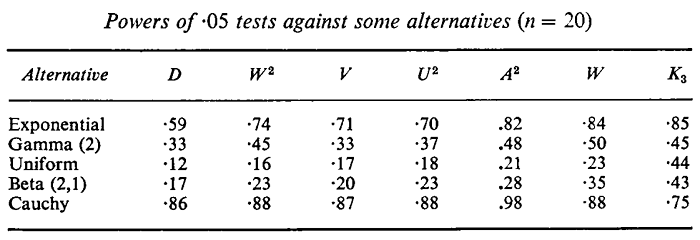


Особо полезным критерий выступает при проверке **нормальности распределения против экспоненциальности**

Оценим мощность критерия при альтернативе <br><br>
Сформируем $5000$ выборок размера $n = 3..50$ из экспоненциального распределения с параметром $\lambda = 2$, посчитаем статистику для каждой такой выборки и посмотрим, какая доля выборочных статистик попала в критическую область, определенную для $n = 3..50 \ и \ m = 1..5$ <br><br>
Запишем результаты в файл **"power_exp.csv"**

In [150]:
power_exp = pd.DataFrame().reindex_like(new_points)
power_exp.index.name = 'n'
power_exp.columns.name = 'm'

N = 5000
rng = np.random.default_rng(42)

for m in power_exp.columns:
  for n in power_exp.index:
    if not pd.isna(new_points.loc[n, m]):
      count = 0
      point = new_points.loc[n, m]
      for i in range(N):
        sample = rng.exponential(scale=2, size = n)
        count += 1 if vasicek_stat(sample, n, m) <= point else 0
      power_exp.loc[n, m] = count/N

power_exp.to_csv("power_exp.csv", index_label="n")

In [8]:
power_exp = pd.read_csv("power_exp.csv")
power_exp = power_exp.set_index('n')
power_exp.columns.name = 'm'
power_exp.sample(7).sort_index()

m,1,2,3,4,5
n,,,,,
15,0.5074,0.6748,0.6748,NaN,NaN
16,0.5440,0.7076,0.7214,0.7386,NaN
20,0.6698,0.8074,0.8434,0.8404,NaN
23,NaN,0.8630,0.8980,0.9076,NaN
26,NaN,0.9092,0.9358,0.9392,0.9476
36,NaN,NaN,0.9876,0.9892,0.9910
50,NaN,NaN,0.9998,0.9994,0.9990


Построим графики мощностей для каждого $m = 1..5$ и отметим значения $n$, при которых оцененная мощность будет $\ge 0.8 $

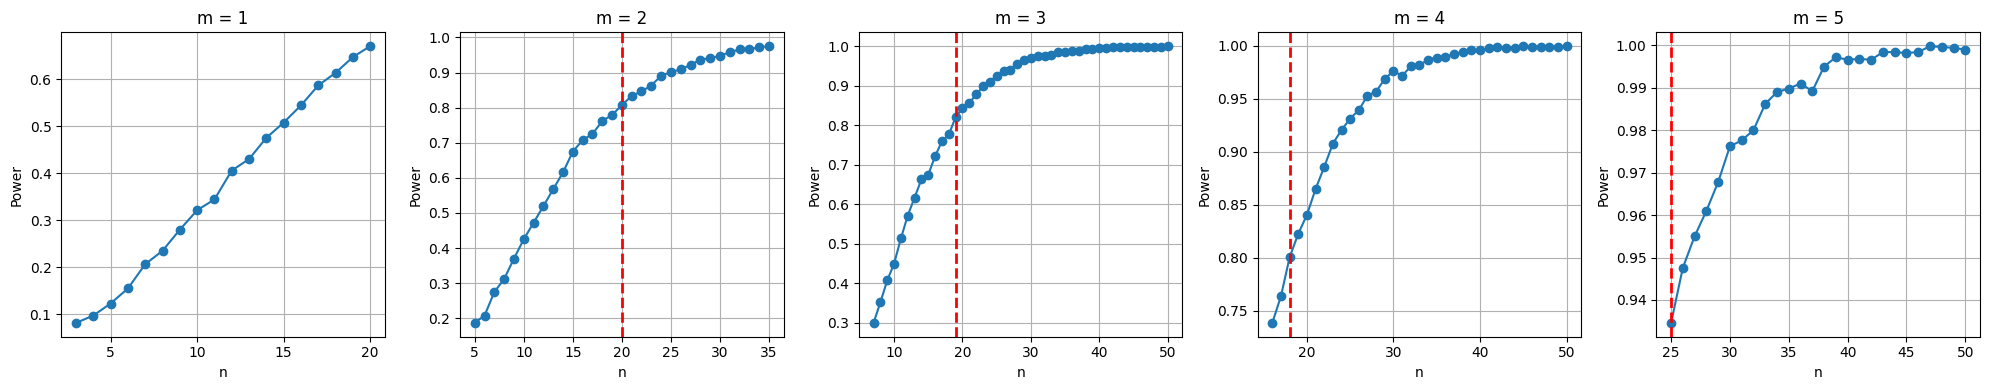

In [26]:
fig = plt.figure(figsize=(20, 4))
gs = gridspec.GridSpec(1, 5)

for i, column in enumerate(power_exp.columns):
    ax = fig.add_subplot(gs[0, i])

    ax.plot(power_exp.index, power_exp[column], marker='o')
    ax.set_title(f'm = {column}')
    ax.set_xlabel('n')
    ax.set_ylabel(f'Power')
    ax.grid(True)

    n_value = power_exp.index[power_exp[column] >= 0.8].min()
    ax.axvline(x = n_value, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

Видим, что при $n \ge 18$ и $m \ge 2$ мощность критерия будет **более $80$%**, а при $n \ge 25$ **более $90$%** <br>
Однако при значениях $n < 18$ мощность не так велика

## Критерии Васичека и Шапиро-Уилка для проверки альтернативы

В [1] и [2] также мощным критерием для проверки нормальности распределения против экспоненциальности считается *критерий Шапиро-Уилка*, который реализован в стандартной библиотеке $scipy.stats$: [ссылка на официальную документацию](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)<br><br>
Проверим, так же посчитав долю случаев, при которых гипотеза о нормальности отвергается для выборок размера $n = 3..50$ (количество $N = 5000$)

In [188]:
power_exp_shapiro = pd.Series(index = np.arange(3, 51), name="Shapiro")

N = 5000

rng = np.random.default_rng(42)
for n in power_exp_shapiro.index:
    count = 0
    for i in range(N):
      sample = rng.exponential(scale=2, size = n)
      statistic, p_value = scipy.stats.shapiro(sample)
      count += 1 if p_value <= 0.05 else 0
    power_exp_shapiro[n] = count / N
power_exp_shapiro.to_csv("power_exp_shapiro.csv")

Сохраним результат в таблицу **"power_exp_shapiro.csv"**

In [10]:
power_exp_shapiro = pd.read_csv("power_exp_shapiro.csv")
power_exp_shapiro = power_exp_shapiro.set_index(power_exp_shapiro.columns[0])
power_exp_shapiro.index.name = 'n'
power_exp_shapiro.head(3)

,Shapiro
n,
3,0.0816
4,0.1210
5,0.1578


Сравним оцененные мощности двух критериев для одной и той же альтернативы <br>
(выбираем $m$ для каждого $n$ такой, чтобы мощность была максимальна)

In [11]:
power_exp_max = pd.Series(index = power_exp.index)
for n in power_exp_max.index:
  power_exp_max[n] = power_exp.loc[n].max()

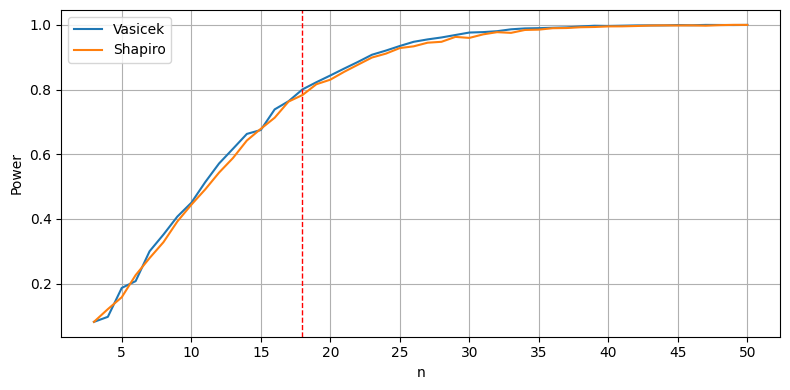

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(power_exp_max, label="Vasicek")

n_value = power_exp_max[power_exp_max >= 0.8].index.min()
ax.axvline(x = n_value, color='red', linestyle='--', linewidth=1)

ax.plot(power_exp_shapiro, label="Shapiro")

ax.set_xlabel("n")
ax.set_xticks(np.arange(5, 51, 5))
ax.set_ylabel("Power")

ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

Видим, что мощности почти совпадают, однако критерий Васичека ошибается в чуть меньшем количестве случаев <br><br>
*Но как поведут себя критерии, если поменять параметр экспоненциального распределения $\lambda$?* <br><br>
Для этого выберем 50 значений $\lambda$ из промежутка $(0; 5)$ и посчитаем долю случаев для обоих критериев, при которых гипотеза о нормальности не принимается <br><br>
Формируем $N = 2000$ выборок размера $n = 10..50$

In [19]:
multi_index = pd.MultiIndex.from_tuples([(lam, i) for lam in np.linspace(0.001, 5, 50) for i in ['Vasicek', 'Shapiro']], names=['Lambda', 'Method'])
power_exp_lambda = pd.DataFrame(columns = range(10, 51, 10), index = multi_index)

N = 2000

rng = np.random.default_rng(42)

for n in range(10, 51, 10):
  m = 3 if n in [10, 20] else 5
  point = new_points.loc[n, m]

  for lamb in np.linspace(0.001, 5, 50):
    count_vasicek = 0
    count_shapiro = 0

    for i in range(N):
      sample = rng.exponential(scale=lamb, size = n)

      statistic, p_value = scipy.stats.shapiro(sample)
      count_shapiro += 1 if p_value <= 0.05 else 0
      count_vasicek += 1 if vasicek_stat(sample, n, m) <= point else 0

    power_exp_lambda.loc[(lamb, 'Vasicek'), n] = count_vasicek / N
    power_exp_lambda.loc[(lamb, 'Shapiro'), n] = count_shapiro / N


power_exp_lambda.to_csv("power_exp_lambda.csv")

Сохраним результат в файл **"power_exp_lambda"**

In [23]:
power_exp_lambda = pd.read_csv("power_exp_lambda.csv")
power_exp_lambda = power_exp_lambda.set_index(['Lambda', 'Method'])
power_exp_lambda.head(4)

10      20      30     40      50
Lambda  Method                                       
0.00100 Vasicek  0.465  0.8455  0.9735  0.997  0.9995
        Shapiro  0.457  0.8300  0.9700  0.994  0.9995
0.10302 Vasicek  0.467  0.8300  0.9685  0.997  0.9995
        Shapiro  0.445  0.8255  0.9610  0.994  0.9995

Построим графики мощностей для каждого $n = 10..50$ <br>
Отметим медианы для каждого критерия и посчитаем, в каких процентах случаев оцененная мощность критерия Васичека строго больше

В 96.0% случаев мощность критерия Васичека больше для n = 10
В 80.0% случаев мощность критерия Васичека больше для n = 20
В 100.0% случаев мощность критерия Васичека больше для n = 30
В 76.0% случаев мощность критерия Васичека больше для n = 40
В 40.0% случаев мощность критерия Васичека больше для n = 50


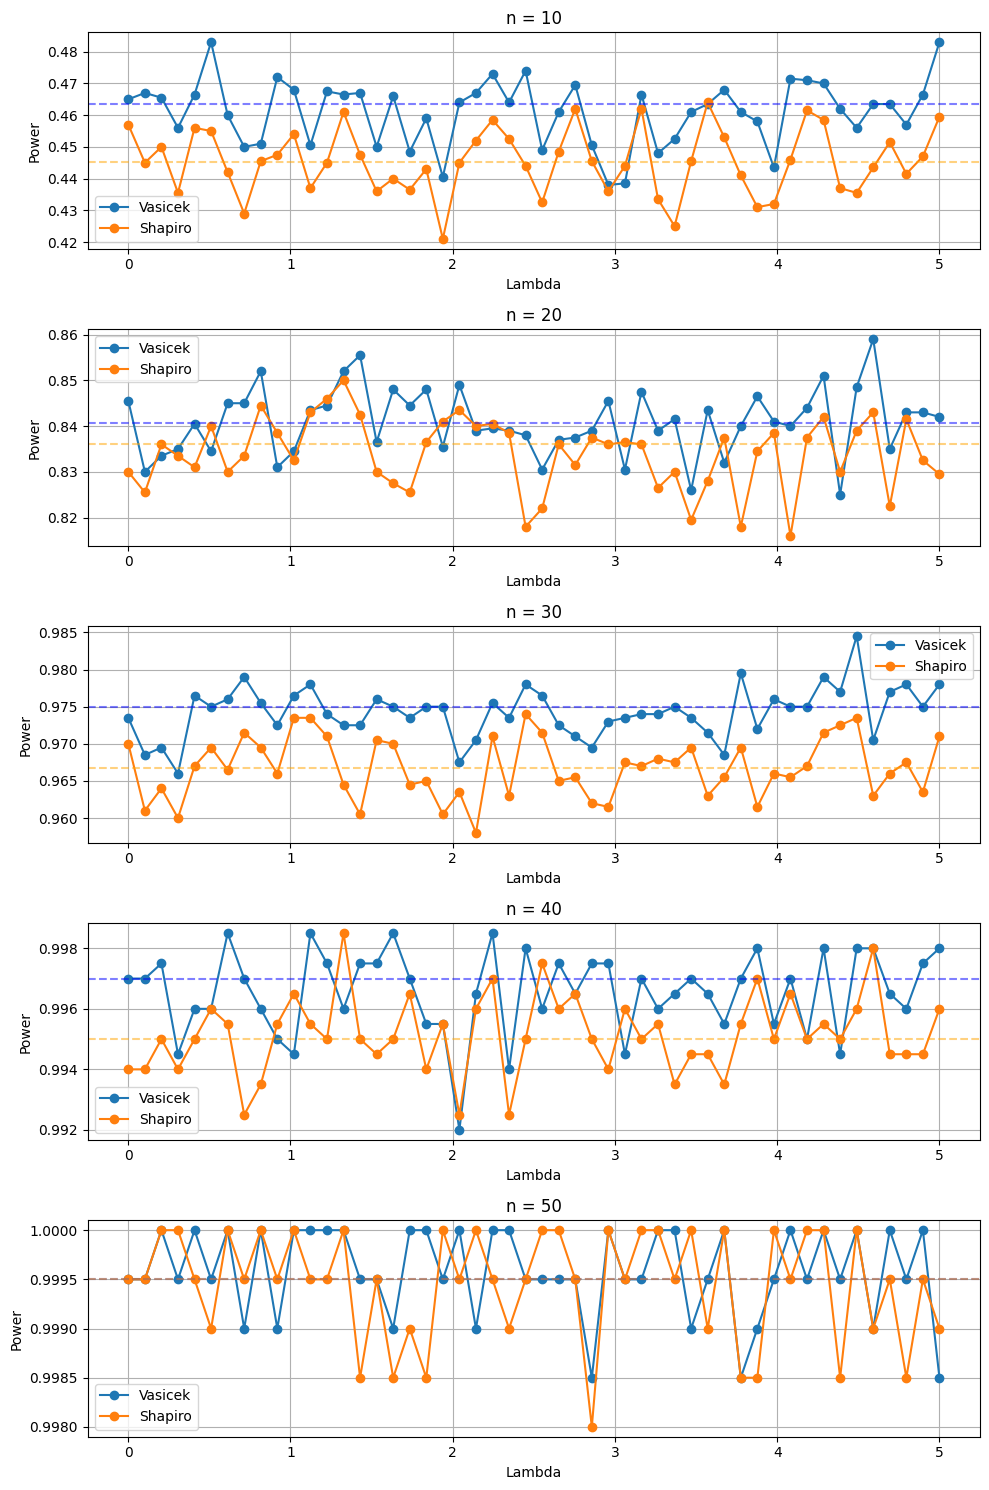

In [76]:
fig = plt.figure(figsize=(10, 15))
gs = gridspec.GridSpec(5, 1)

lamb = power_exp_lambda.index.get_level_values(0)[::2]

for i, n in enumerate(power_exp_lambda.columns):
    ax = fig.add_subplot(gs[i, 0])

    vasicek = power_exp_lambda.loc[(slice(None), 'Vasicek'), n].values
    shapiro = power_exp_lambda.loc[(slice(None), 'Shapiro'), n].values

    ax.plot(lamb, vasicek, marker='o', label='Vasicek')
    ax.plot(lamb, shapiro, marker='o', label='Shapiro')

    print(f'В {np.sum(vasicek > shapiro) / len(vasicek) * 100}% случаев мощность критерия Васичека больше для n = {n}')

    ax.set_title(f"n = {n}")
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Power")

    ax.axhline(y = np.median(power_exp_lambda.loc[(slice(None), 'Vasicek'), n].values), color='blue', linestyle='--', alpha=0.5)
    ax.axhline(y = np.median(power_exp_lambda.loc[(slice(None), 'Shapiro'), n].values), color='orange', linestyle='--', alpha=0.5)

    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


*ИТОГИ*

*  При $n \ge 20$ оцененная мощность обоих критериев **более $80$**%
*  В среднем для $20 \le n \le 40$ критерий Васичека **чаще** отличает экспоненциальное распределение от нормального
*  Для $n \ge 40$ мощность обоих критериев **почти равна 1**

Для выборок $20 \le n \le 40$ критерий Васичека **предпочтительнее** для альтернативы экспоненциальности <br>
Для $n \ge 50$ мощность обоих критериев почти равна 1

## Квантили $5$% для размера выборки $50 \le n \le 200$

В [1] представлены оцененные квантили $5$% для выборки $3 \le n \le 50$ <br>
Посчитаем $5$% квантили для выборки размера $3 \le n \le 200$ и сохраним результат в файл **"Vasicek_points_200.csv"** <br>
Сгенерируем $N = 5000$ выборок размера $n$ из нормального распределения и посчитаем статистику критерия Васичека, далее возьмем $5$% квантиль из полученной выборки

In [48]:
N = 5000

points = pd.DataFrame(index = np.arange(3, 201), columns = np.arange(1, 14))
points.index.name = 'n'
points.columns.name = 'n'

np.random.seed(42)

for m in points.columns:
  place = m ** 2 if m != 1 else 3
  for n in range(place, min(place + 40, 200)):
    crit = []
    for i in range(N):

      sample = np.random.normal(size=n)
      K_m_n = vasicek_stat(sample, n, m)
      crit.append(round(K_m_n, 2))

    point = np.quantile(crit, 0.05)
    points.loc[n, m] = point

points.to_csv("Vasicek_points_200.csv")

In [60]:
points_200 = pd.read_csv("Vasicek_points_200.csv")
points_200 = points_200.set_index("n")
points_200.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13
n,,,,,,,,,,,,,
3,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.02,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.20,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сравним первые 50 строк с табличными значениями $5$% квантилей <br>
Различия довольно малы, а максимальное по всем столбцам и строкам - **0.04** <br>

In [73]:
points_200_slice = points_200.iloc[:48, :5]
points_200_slice.columns = new_points.columns
print(f'Максимальная разница по модулю: {round(abs(points_200_slice - new_points).max().max(),2)}')
abs(points_200_slice - new_points).sample(10)

Максимальная разница по модулю: 0.04


,1,2,3,4,5
n,,,,,
19,0.005,0.015,0.0200,0.015,NaN
47,NaN,NaN,0.0040,0.000,0.010
45,NaN,NaN,0.0000,0.010,0.000
48,NaN,NaN,0.0040,0.020,0.020
20,0.010,0.010,0.0000,0.020,NaN
32,NaN,0.002,0.0240,0.010,0.014
46,NaN,NaN,0.0015,0.010,0.010
50,NaN,NaN,NaN,0.000,0.020
10,0.020,0.010,0.0100,NaN,NaN


Литература:

[1] "A Test for Normality Based on Sample Entropy" By OLDRICH VASICEK <br>
[2] Кобзарь А.И. "Прикладная математическая статистика." 2006 г. <br>
[3] Randall J. LeVeque "Finite Difference Methods for Ordinary and Partial Differential Equations" <br>
[4] Prescott P. On a test for normality based on sample entropy / / JRSS. 1976. V. 38, №3.
P. 254-256.

